In [1]:
%matplotlib notebook
from copy import deepcopy as copy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.io as sio
import pandas as pd
from tqdm import tqdm
import pickle
from collections import OrderedDict
import os
from scipy.ndimage.interpolation import shift
from functools import reduce
import time

from aux import Generic
from disp import set_font_size, get_spaced_colors
from ntwk import LIFNtwkG
from utils.general import *
from utils.file_io import *


In [2]:
def graph_weight_matrix(mat, title, v_max=None, ax=None, cmap='hot'):
    ax.clear()
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), tight_layout=True)
    ax.matshow(mat, vmin=0, vmax=v_max if v_max is not None else mat.max(), cmap=cmap) # 'gist_stern'
    ax.set_title(title)
    set_font_size(ax, 14)

In [15]:
def animate(direc, frame_rate, v_max, cmap='hot', kind='w_r_e', show_all=False):
    file_names = [f for f in sorted(all_files_from_dir(direc))]
    plt.ion()
    if not show_all:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

    for i_f in range(0, len(file_names), frame_rate):
        if show_all:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
        file = file_names[i_f]
        loaded = sio.loadmat(os.path.join(direc, file))
        if i_f == 0:
            w_r_initial = copy(loaded[kind])
            
        graph_weight_matrix(loaded[kind], f'{i_f}', ax=ax, v_max=v_max, cmap=cmap)
        plot_w_r(loaded[kind], row_max=600, col_max=600)
        fig.canvas.draw()
        if not show_all:
            time.sleep(0.000001)
    
    loaded = sio.loadmat(os.path.join(direc, file_names[-1]))
    graph_weight_matrix(loaded[kind], f'{len(file_names) - 1}', ax=ax, v_max=v_max, cmap=cmap)
    w_r_final = copy(loaded[kind])
    return w_r_initial, w_r_final

In [10]:
def plot_w_r(w_r, row_min=0, row_max=None, col_min=0, col_max=None):
    if row_max is None:
        row_max = w_r.shape[0]
    if col_max is None:
        col_max = w_r.shape[1]
    target_w_r = w_r[row_min:row_max, col_min:col_max]
    incoming_weights = target_w_r.sum(axis=1)
    fig, ax = plt.subplots(3, 1, figsize=(7, 9), tight_layout=True)
    ax[0].scatter(np.arange(len(incoming_weights)), incoming_weights, s=3)
    ax[0].set_ylabel('Summed Incoming Synapse Strength')
    
    print(f'average summed incoming weight per cell: {np.mean(incoming_weights)} +/- {np.std(incoming_weights)}')

    thresh = 1e-6
    thresholded = np.where(target_w_r > thresh, 1, 0)
    thresholded_target_w_r = np.where(thresholded, target_w_r, np.nan)
    counts = np.count_nonzero(thresholded, axis=1)
    print(f'average incoming connections per cell: {np.mean(counts)} +/- {np.std(counts)}')

    ax[1].fill_between(x=np.arange(len(incoming_weights)),
                   y1=np.nanmean(thresholded_target_w_r, axis=1) - np.nanstd(thresholded_target_w_r, axis=1)/np.sqrt(counts),
                   y2=np.nanmean(thresholded_target_w_r, axis=1) + np.nanstd(thresholded_target_w_r, axis=1)/np.sqrt(counts),
                    color='red', alpha=0.2)

    ax[1].scatter(np.arange(len(incoming_weights)), np.nanmean(thresholded_target_w_r, axis=1), s=1, c='red')  
    
    ax[1].set_ylabel('Incoming Individual Synapse Strength')

    ax[2].scatter(np.arange(len(counts)), counts, c='red', s=3)
    ax[2].set_xlabel('Neuron Idx')
    ax[2].set_ylabel('Num Connections over Threshold')

<IPython.core.display.Javascript object>


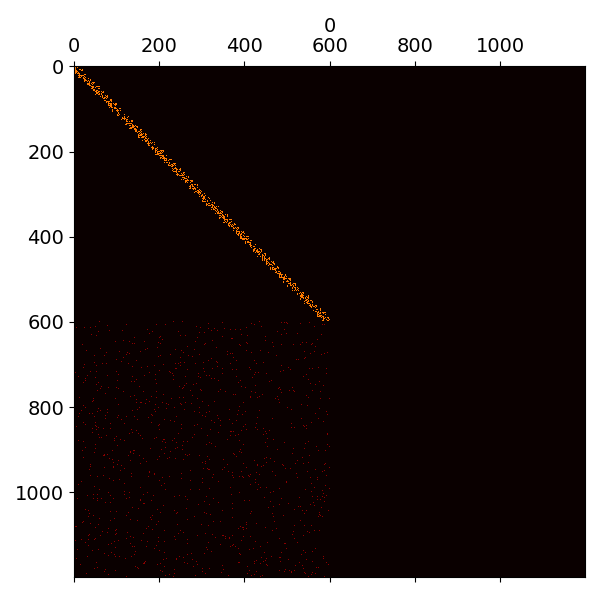

<IPython.core.display.Javascript object>


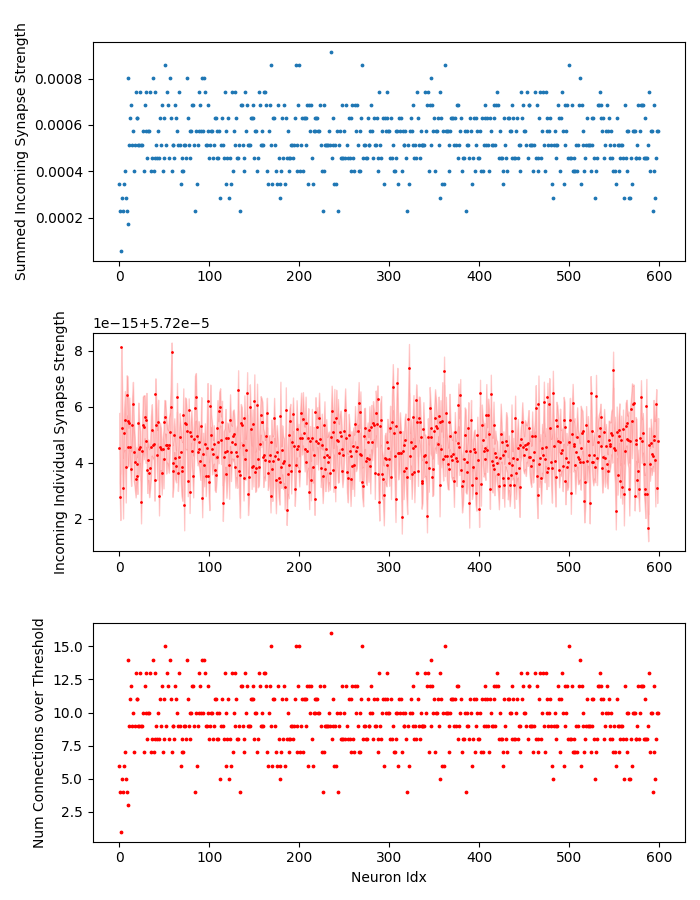

average summed incoming weight per cell: 0.0005386333334182634 +/- 0.00012725839522737632
average incoming connections per cell: 9.416666666666666 +/- 2.2247971193396987


<IPython.core.display.Javascript object>


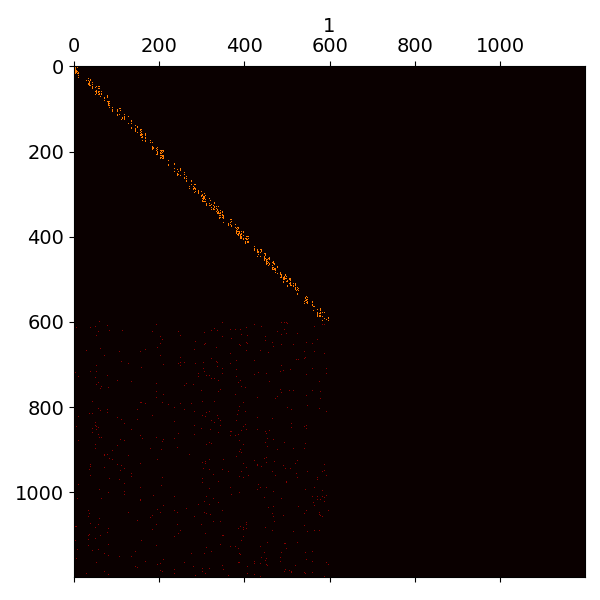

<IPython.core.display.Javascript object>


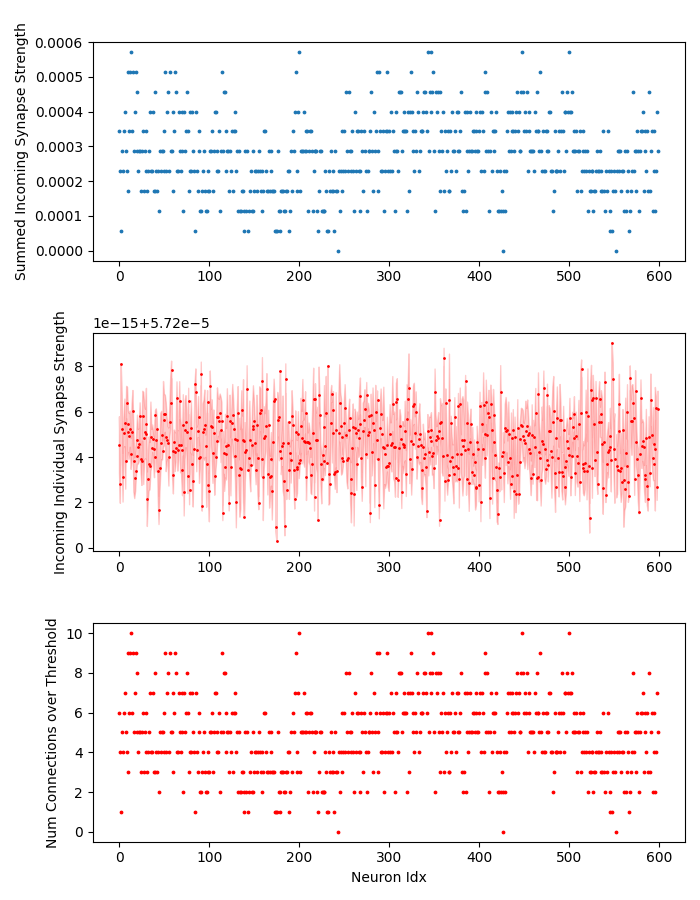

average summed incoming weight per cell: 0.0002765620000436743 +/- 0.00011137279690585428
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


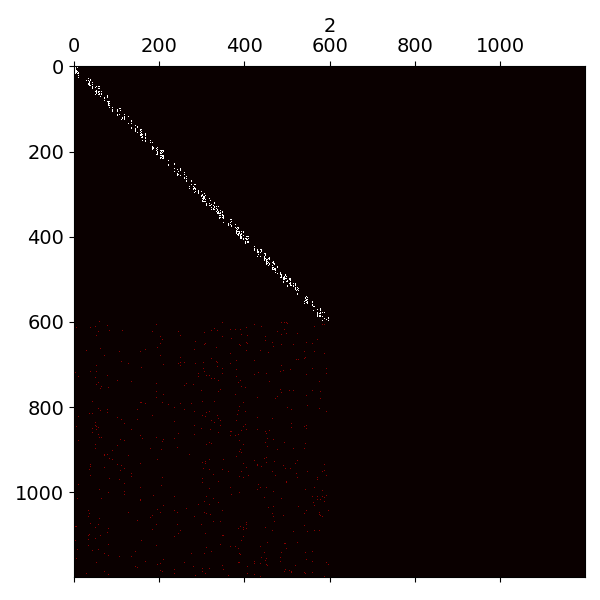

<IPython.core.display.Javascript object>


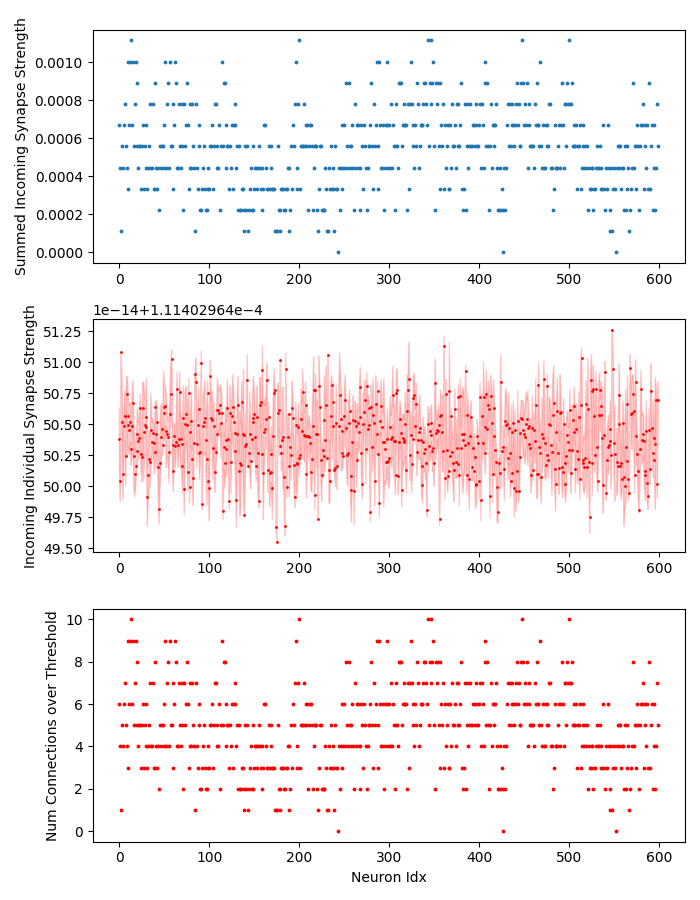

average summed incoming weight per cell: 0.0005386333334182629 +/- 0.0002169101353043515
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


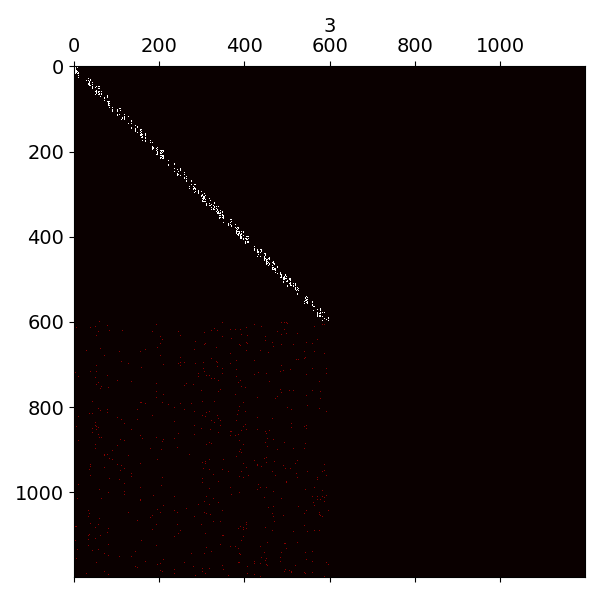

<IPython.core.display.Javascript object>


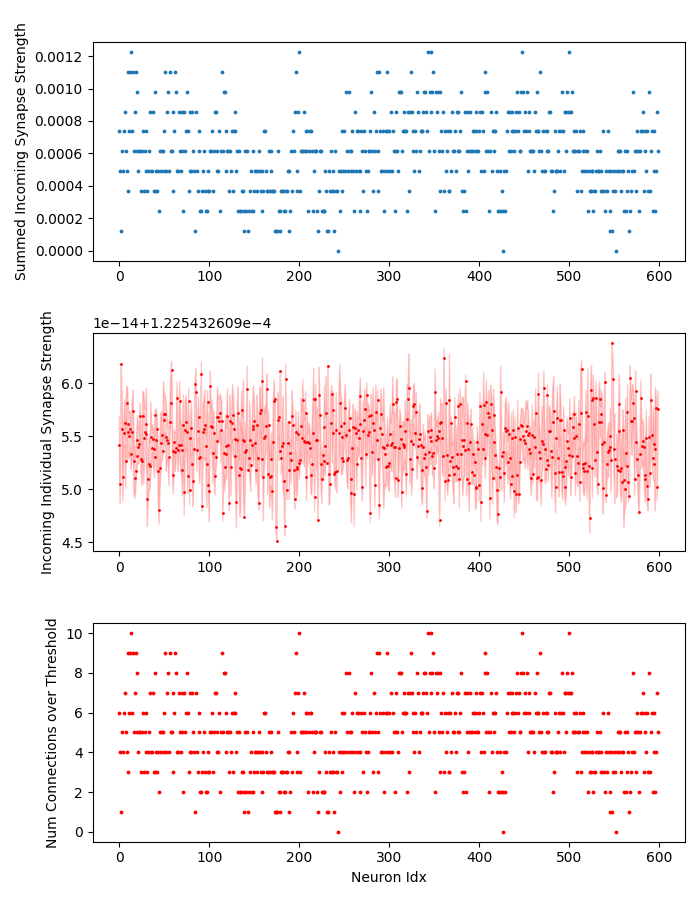

average summed incoming weight per cell: 0.0005924966667600887 +/- 0.00023860114883478652
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


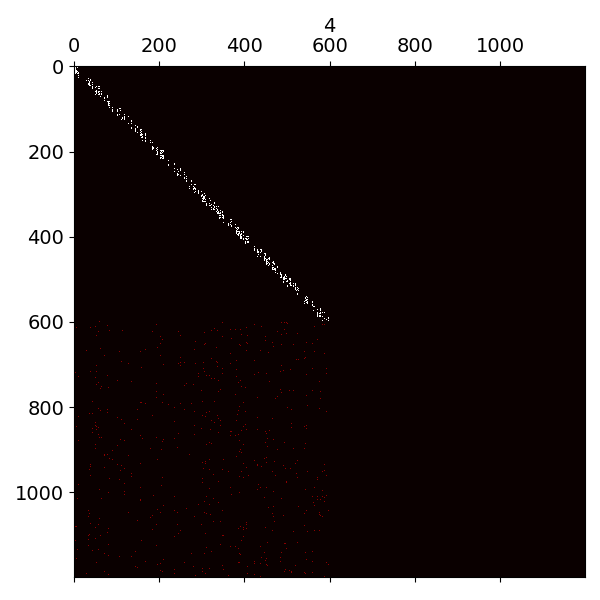

<IPython.core.display.Javascript object>


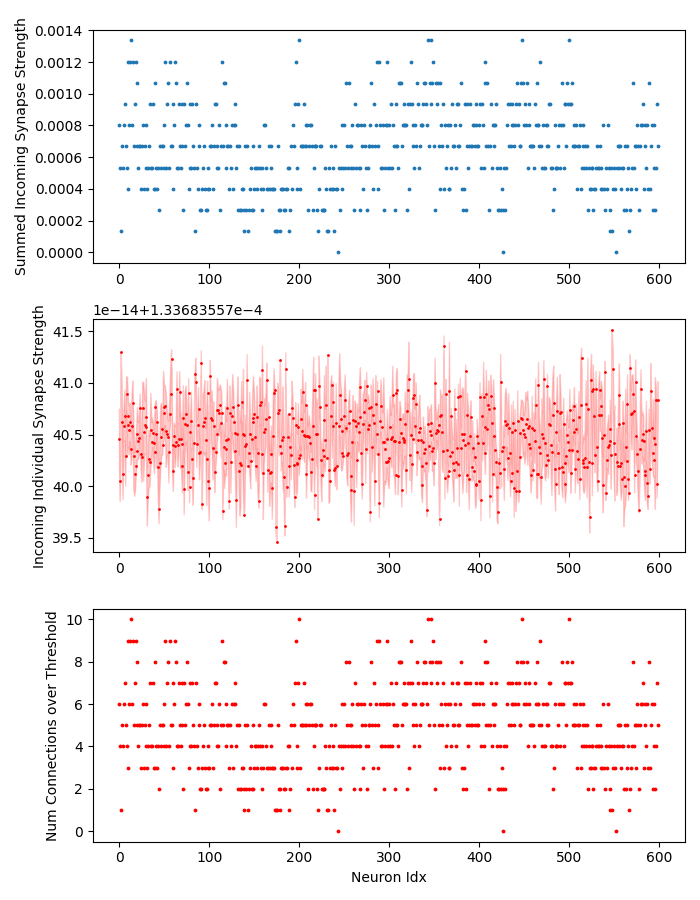

average summed incoming weight per cell: 0.0006463600001019152 +/- 0.00026029216236522177
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


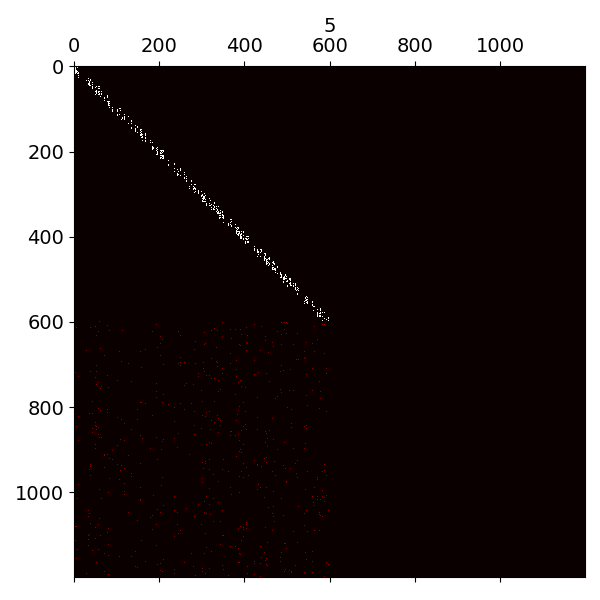

<IPython.core.display.Javascript object>


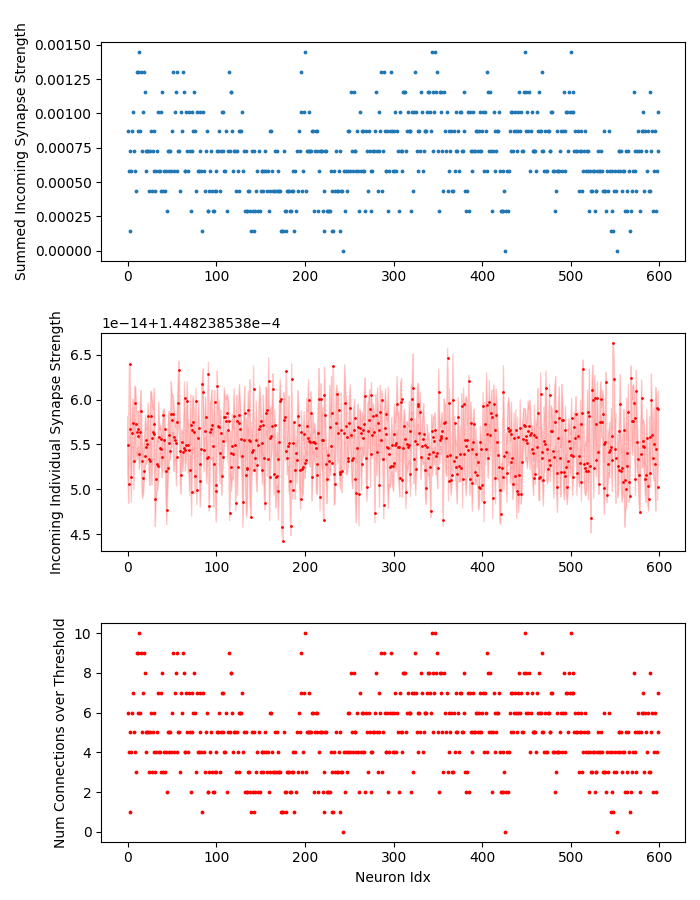

average summed incoming weight per cell: 0.0007002233334437417 +/- 0.0002819831758956569
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


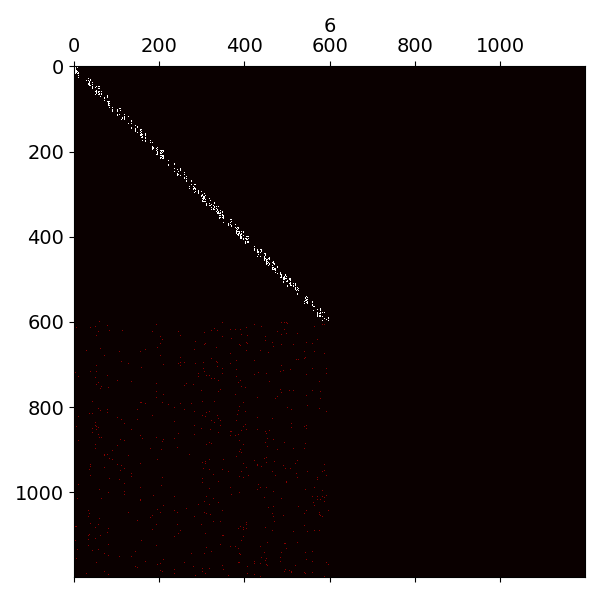

<IPython.core.display.Javascript object>


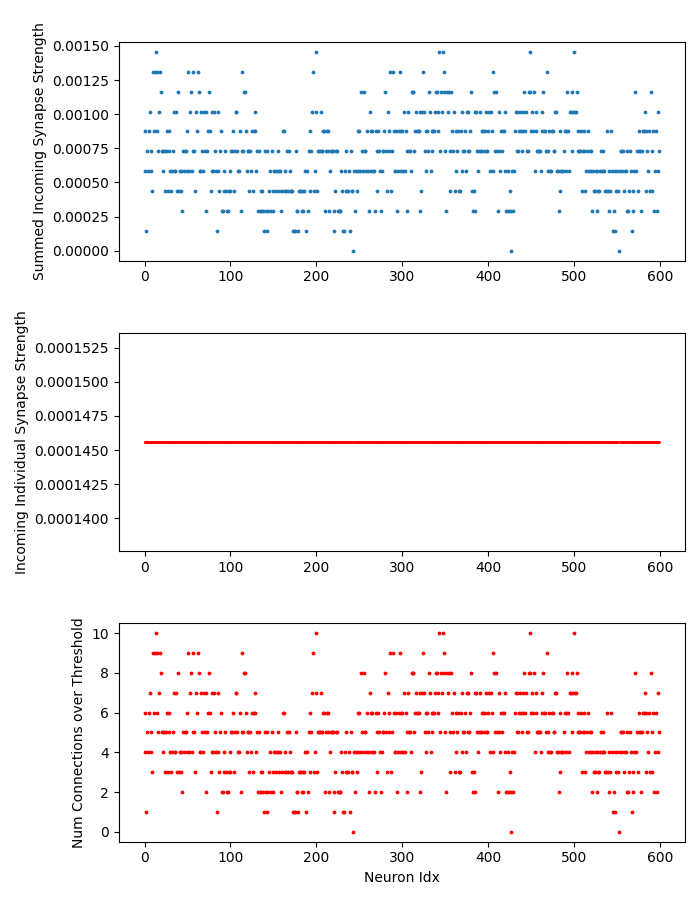

average summed incoming weight per cell: 0.0007039760082165001 +/- 0.00028349439114472535
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


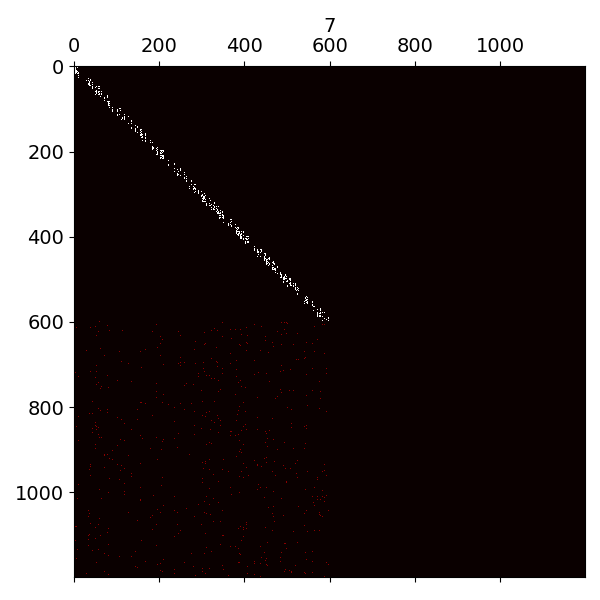

<IPython.core.display.Javascript object>


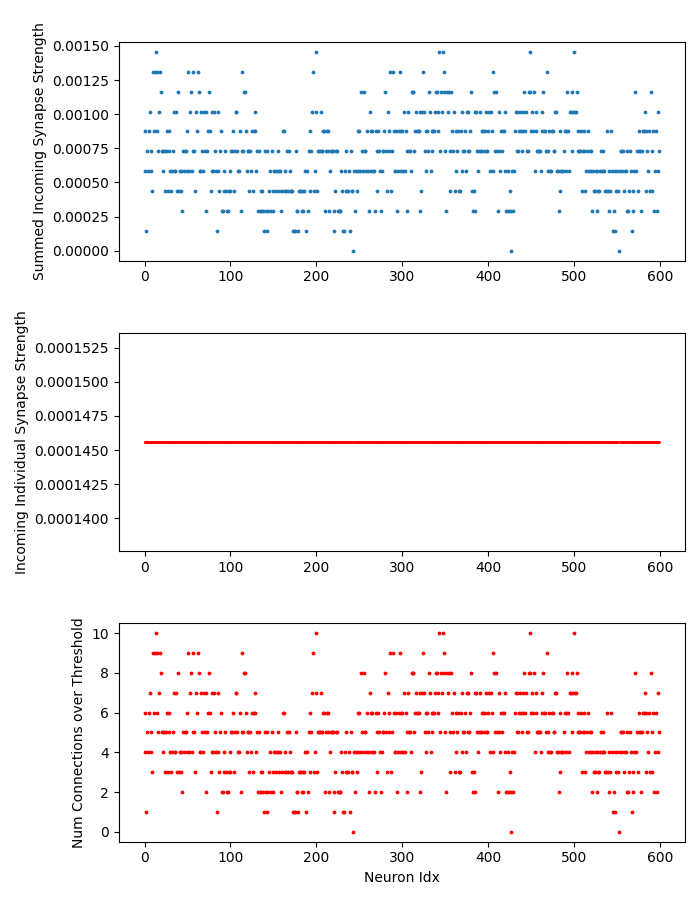

average summed incoming weight per cell: 0.0007042305969028622 +/- 0.0002834645330389232
average incoming connections per cell: 4.835 +/- 1.9470768688814866


<IPython.core.display.Javascript object>


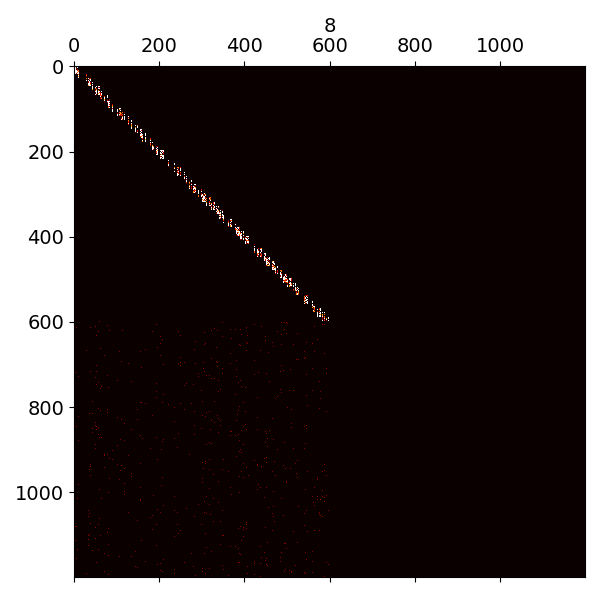

<IPython.core.display.Javascript object>


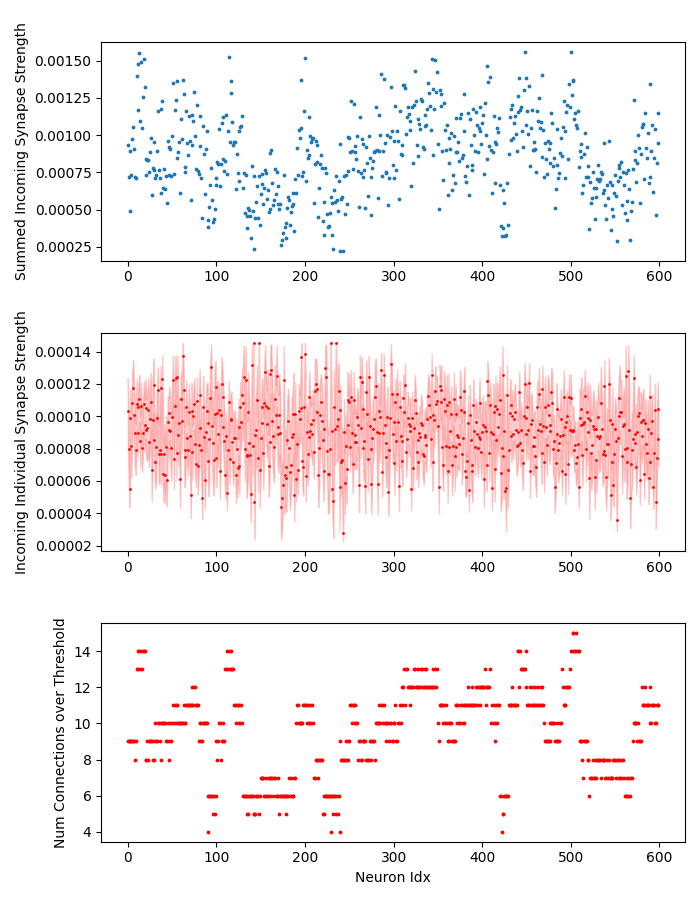

average summed incoming weight per cell: 0.0008618000029438538 +/- 0.0002748461611522925
average incoming connections per cell: 9.528333333333334 +/- 2.335779075359844


<IPython.core.display.Javascript object>


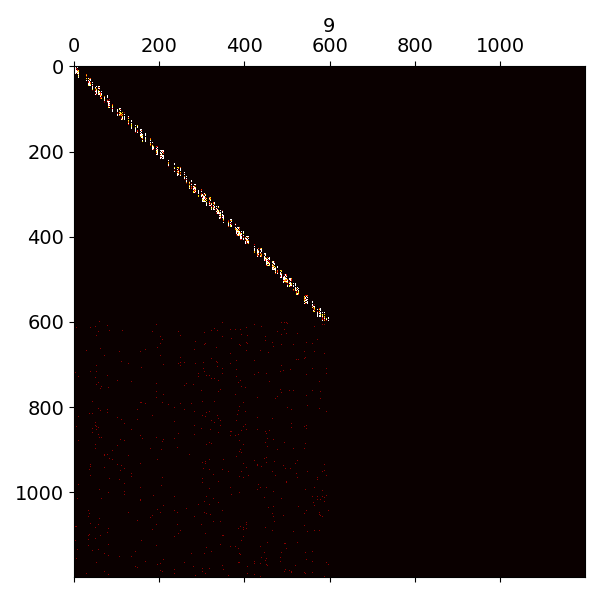

<IPython.core.display.Javascript object>


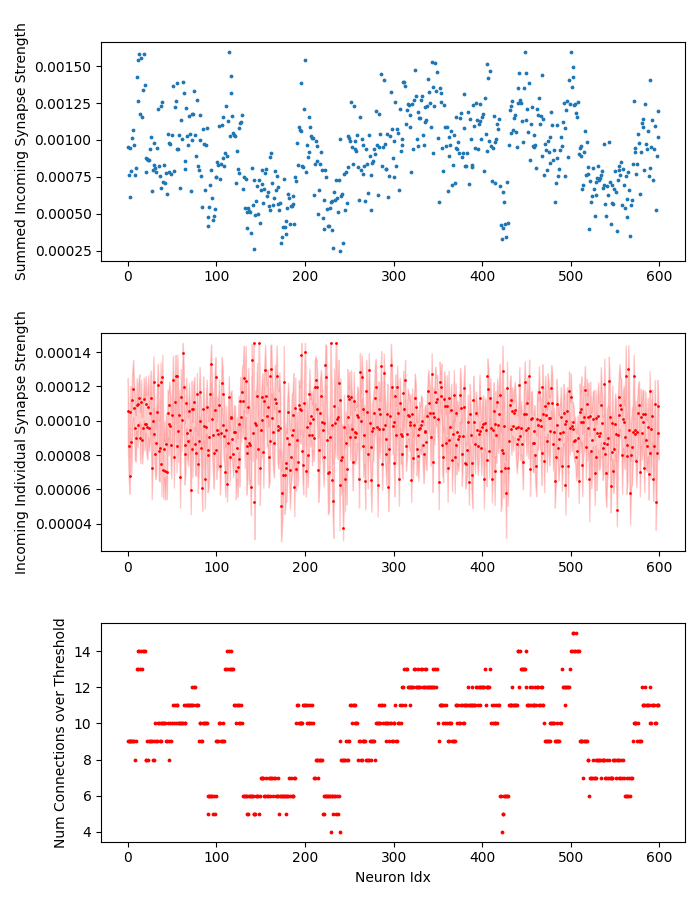

average summed incoming weight per cell: 0.0009156766667739845 +/- 0.0002765691740578212
average incoming connections per cell: 9.543333333333333 +/- 2.333407141689784


<IPython.core.display.Javascript object>


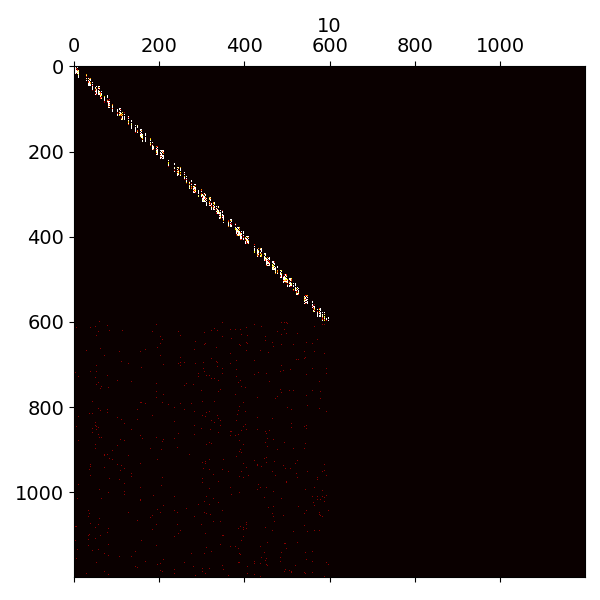

<IPython.core.display.Javascript object>


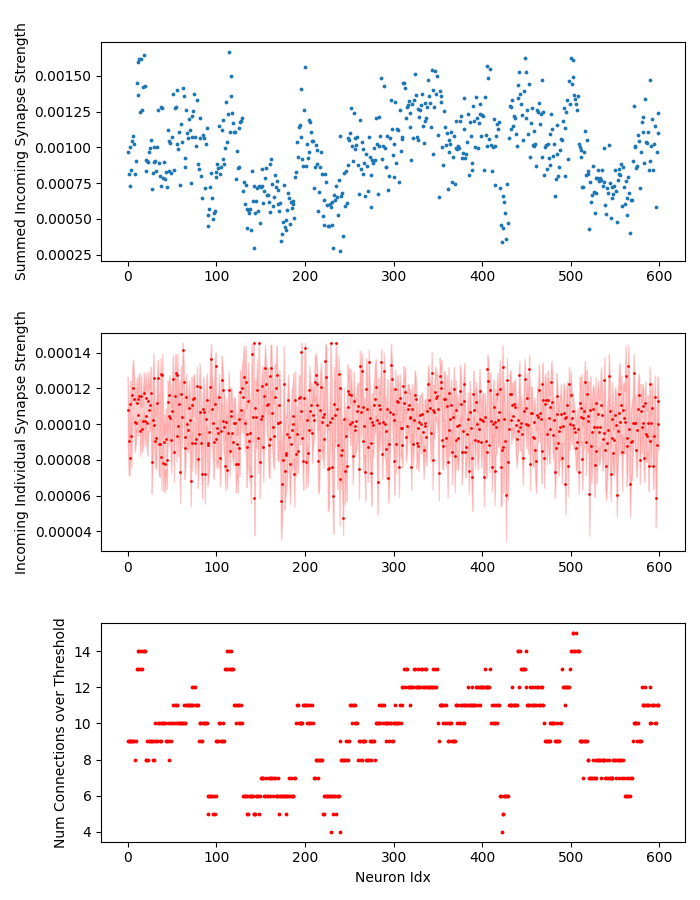

average summed incoming weight per cell: 0.0009695400001527352 +/- 0.00028064651679145485
average incoming connections per cell: 9.555 +/- 2.329586873245984


<IPython.core.display.Javascript object>


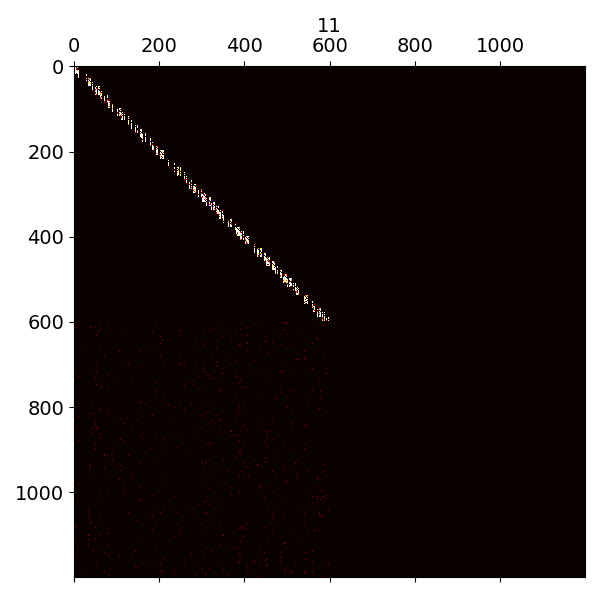

<IPython.core.display.Javascript object>


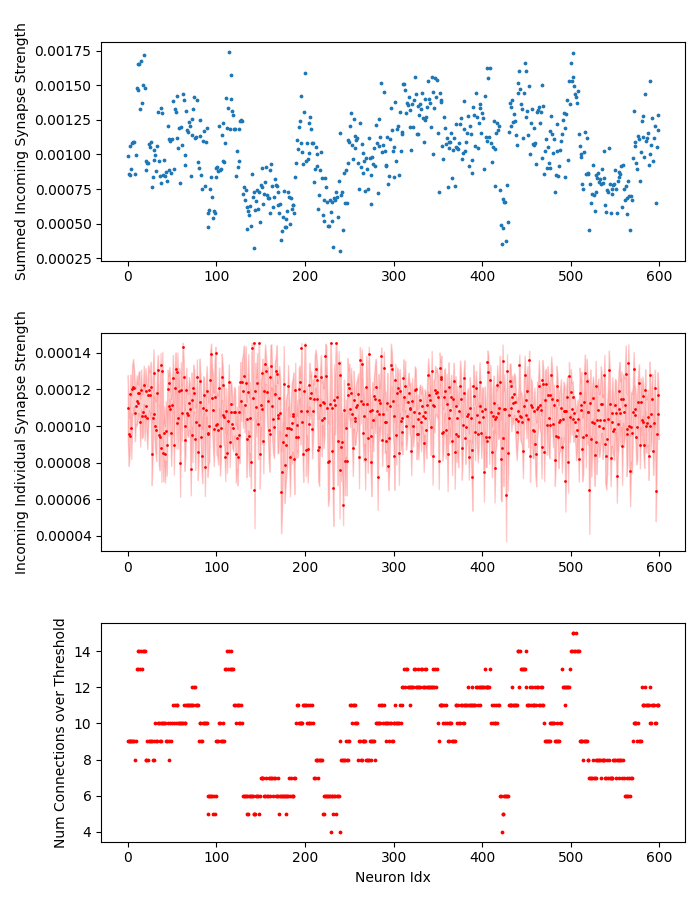

average summed incoming weight per cell: 0.0010234033334946997 +/- 0.000286977981453041
average incoming connections per cell: 9.556666666666667 +/- 2.3281155946864454


In [16]:
w_r_e_initial, w_r_e_final = animate('./data/noise_ff_0.5_pf_0.5_pr_0.5_eir_2.0_ier_0.5_dropout_sweep_2021-02-19--12:21--31:1347_0_0', 1, 0.26 * 0.004 * 1. / 10,
                                 cmap='hot', kind='w_r_e', show_all=True)

<IPython.core.display.Javascript object>


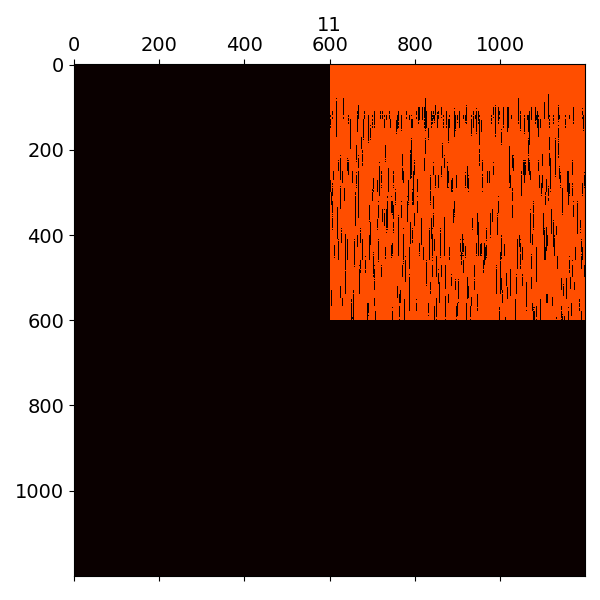

In [6]:
w_r_i_initial, w_r_i_final = animate('./data/noise_ff_0.5_pf_0.5_pr_0.5_eir_2.0_ier_0.5_dropout_sweep_2021-02-19--12:21--31:1347_0_0', 5, 0.26 * 0.004 * 0.1 / 10,
                                 cmap='hot', kind='w_r_i')

<IPython.core.display.Javascript object>


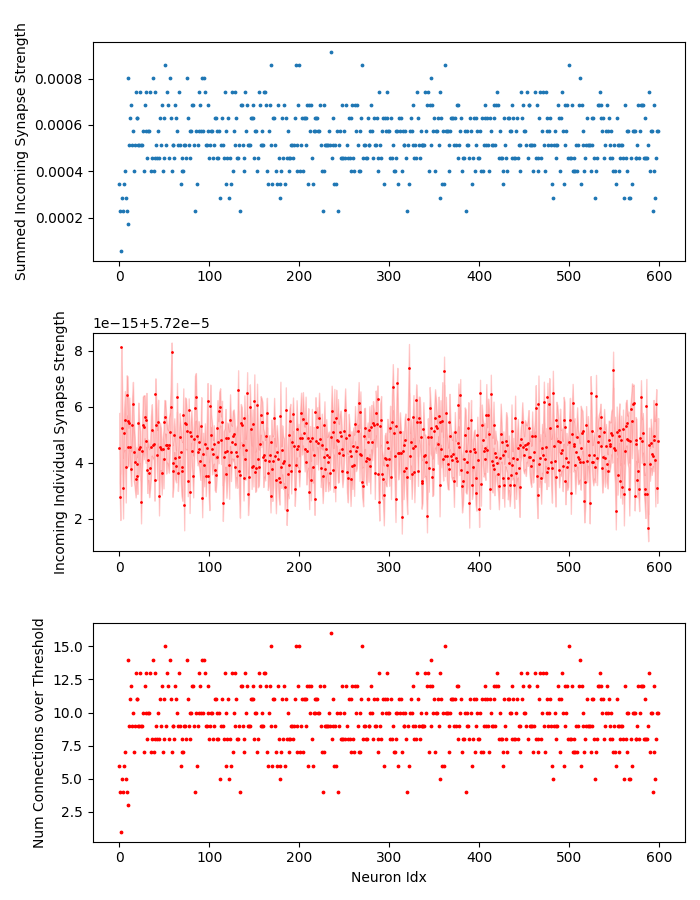

average summed incoming weight per cell: 0.0005386333334182634 +/- 0.00012725839522737632
average incoming connections per cell: 9.416666666666666 +/- 2.2247971193396987


In [7]:
plot_w_r(w_r_e_initial, row_max=600, col_max=600)

<IPython.core.display.Javascript object>


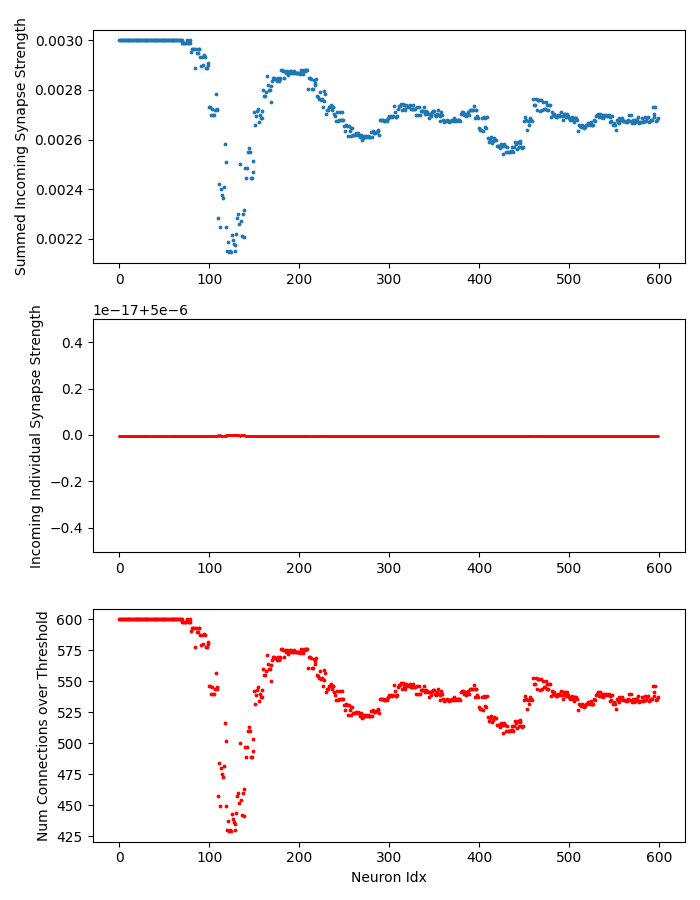

average summed incoming weight per cell: 0.002723474999999973 +/- 0.0001662186292457349
average incoming connections per cell: 544.695 +/- 33.24372584914834


In [8]:
plot_w_r(w_r_i_initial, row_max=600, col_min=600, col_max=1200)